In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/105/Data


In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
EBM_data = pd.read_csv('/content/drive/My Drive/Data/EBM_data.csv', index_col=[0], delimiter=";", parse_dates= [0])


In [4]:
EBM_data.head()

,confirmed_cases
day,
1,1
2,2
3,2
4,2
5,3


In [5]:
EBM_data.tail()

,confirmed_cases
day,
96,753018
97,753063
98,753103
99,753137
100,753167


In [6]:
EBM_data.describe()

,confirmed_cases
count,100.000000
mean,391660.550000
std,349097.461769
min,1.000000
25%,1044.000000
50%,522014.500000
75%,747514.250000
max,753167.000000


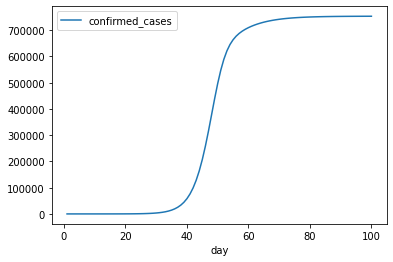

In [7]:
EBM_data.plot()

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


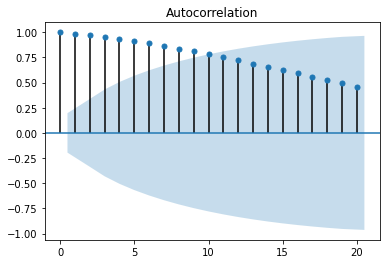

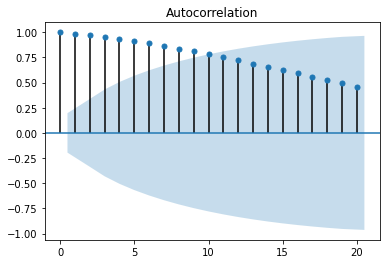

In [9]:
plot_acf(EBM_data)

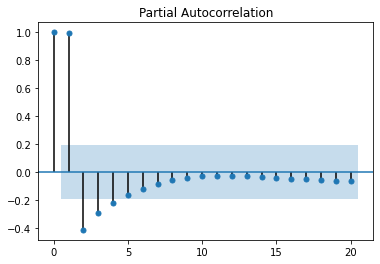

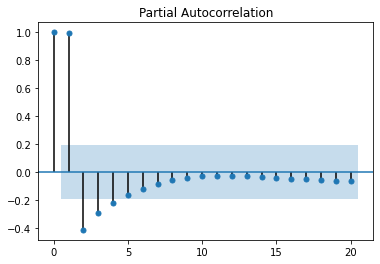

In [10]:
plot_pacf(EBM_data)

In [11]:
EBM_data.size

100

In [0]:
EBM_data_train = EBM_data[0:80]
EBM_data_test = EBM_data[80:100]

In [13]:
EBM_data_train.size

80

In [14]:
EBM_data_test.size

20

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
EBM_data_model = ARIMA(EBM_data_train, order=(3,0,0))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [17]:
EBM_data_model_fit = EBM_data_model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
EBM_data_model_fit.aic

1335.7644259187423

In [0]:
EBM_data_forecast = EBM_data_model_fit.forecast(steps = 20)[0]

In [20]:
EBM_data_forecast

array([750658.86960922, 750953.49533365, 751165.8481332 , 751293.99908944,
       751338.08479593, 751300.22521061, 751184.39772993, 750996.272136  ,
       750743.0118161 , 750433.04724536, 750075.82815068, 749681.56103297,
       749260.93881622, 748824.86931923, 748384.20901822, 747949.50819601,
       747530.77307126, 747137.24988596, 746777.23521963, 746457.91601528])

In [21]:
EBM_data_test

,confirmed_cases
day,
81,750675
82,751015
83,751312
84,751572
85,751800
86,751998
87,752172
88,752324
89,752456


In [0]:
from sklearn.metrics import mean_squared_error

In [23]:
np.sqrt(mean_squared_error(EBM_data_test, EBM_data_forecast))

3571.329385969747

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


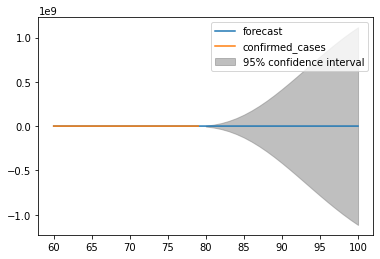

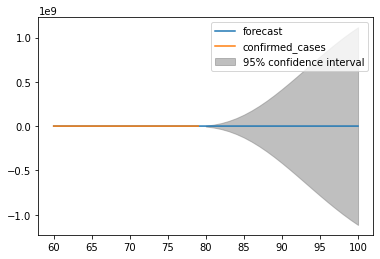

In [24]:
EBM_data_model_fit.plot_predict(60,100)

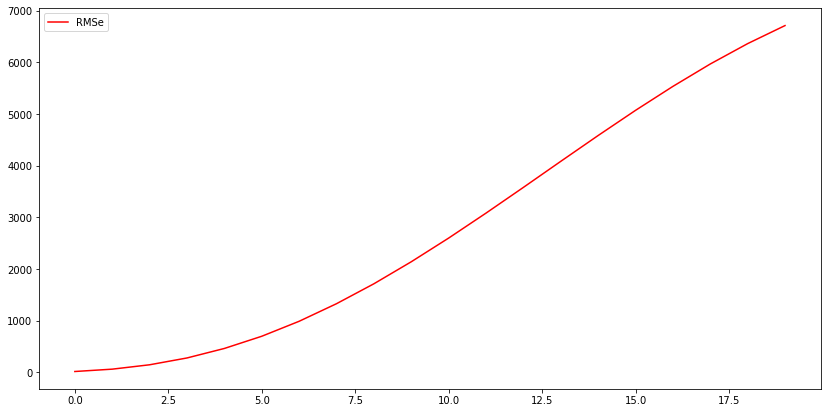

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=[]
for i in range(len(EBM_data_test)):
   #print(sqrt(((EBM_data_test.values[i][0] - EBM_data_forecast[i]) ** 2).mean()))
   rmse.append(sqrt(((EBM_data_test.values[i][0] - EBM_data_forecast[i]) ** 2).mean()))


plt.figure(figsize=(14, 7))
plt.plot(range(len(EBM_data_test)), rmse, color="red", label="RMSe")
plt.legend()